In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data partition
from sklearn.model_selection import train_test_split

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler


# embedded methods
from sklearn.linear_model import LassoCV

# Encoding
from sklearn.preprocessing import LabelEncoder

# Modelling and report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.impute import KNNImputer

#from xgboost import XGBClassifier

# Imbalanced dataset
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')


pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.max_colwidth')




In [100]:
data_train = pd.read_csv('train.csv')
data_train.head()

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
0,533253,USA,70110,Caucasian,Female,[70-80),?,?,0,0,...,276,466,8,NaN,NaN,No,No,[],No,>30 days
1,426224,USA,29775006,AfricanAmerican,Male,[50-60),?,?,0,0,...,785,162,9,NaN,NaN,No,Yes,['insulin'],No,No
2,634063,USA,80729253,Caucasian,Female,[60-70),?,?,0,0,...,135,250,6,NaN,NaN,Ch,Yes,"['glimepiride', 'insulin']",No,No
3,890610,USA,2919042,AfricanAmerican,Male,[60-70),?,MC,0,0,...,562,455,5,NaN,NaN,No,No,[],No,No
4,654194,USA,84871971,Caucasian,Female,[70-80),?,HM,1,0,...,599,428,9,NaN,NaN,No,No,[],No,>30 days


In [101]:
data_validation = pd.read_csv('test.csv')
data_validation.head()

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication
0,499502,USA,103232799,Caucasian,Male,[80-90),?,HM,0,0,...,14,491,414,250,6,NaN,NaN,No,Yes,['metformin']
1,447319,USA,93395304,Caucasian,Male,[20-30),?,HM,0,0,...,7,250.13,70,794,7,>300,NaN,No,No,[]
2,309126,USA,6281586,AfricanAmerican,Male,[30-40),?,?,0,0,...,12,786,250.6,536,6,NaN,NaN,No,Yes,['insulin']
3,181183,USA,67381308,Caucasian,Male,[50-60),?,BC,0,0,...,16,820,873,E884,9,NaN,NaN,Ch,Yes,"['metformin', 'glyburide', 'insulin']"
4,359339,USA,71670204,Caucasian,Male,[60-70),?,?,0,0,...,10,599,427,414,9,NaN,NaN,No,Yes,['metformin']


In [102]:
#data_train.info()

In [103]:
data_train.set_index('encounter_id', inplace = True)

In [104]:
# Count the occurrences of "?" or NaN in each column
question_mark_count = data_train.applymap(lambda x: x == '?').sum()

# Calculate the percentage of "?" or NaN values in each column
percentage_question_mark = (question_mark_count / len(data_train)) * 100

# Print the result
print(percentage_question_mark)  # values in percent

# --> Almost no values for weight, glucose_test_result, alc_test_result



country                                   0.000000
patient_id                                0.000000
race                                      2.128137
gender                                    0.000000
age                                       0.000000
weight                                   96.847100
payer_code                               39.588130
outpatient_visits_in_previous_year        0.000000
emergency_visits_in_previous_year         0.000000
inpatient_visits_in_previous_year         0.000000
admission_type                            0.000000
medical_specialty                        49.022966
average_pulse_bpm                         0.000000
discharge_disposition                     0.000000
admission_source                          0.000000
length_of_stay_in_hospital                0.000000
number_lab_tests                          0.000000
non_lab_procedures                        0.000000
number_of_medications                     0.000000
primary_diagnosis              

In [105]:
# Count the occurrences of "?" or NaN in each column
nan_count = data_train.applymap(lambda x: pd.isna(x)).sum()

# Calculate the percentage of "?" or NaN values in each column
percentage_nan = (nan_count / len(data_train)) * 100

# Print the result
print(percentage_nan)  # values in percent

# --> Almost no values for weight, glucose_test_result, alc_test_result

country                                   0.000000
patient_id                                0.000000
race                                      4.989050
gender                                    0.000000
age                                       4.993262
weight                                    0.000000
payer_code                                0.000000
outpatient_visits_in_previous_year        0.000000
emergency_visits_in_previous_year         0.000000
inpatient_visits_in_previous_year         0.000000
admission_type                            5.202426
medical_specialty                         0.000000
average_pulse_bpm                         0.000000
discharge_disposition                     3.635802
admission_source                          6.623056
length_of_stay_in_hospital                0.000000
number_lab_tests                          0.000000
non_lab_procedures                        0.000000
number_of_medications                     0.000000
primary_diagnosis              

In [106]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71236 entries, 533253 to 459757
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   country                                71236 non-null  object
 1   patient_id                             71236 non-null  int64 
 2   race                                   67682 non-null  object
 3   gender                                 71236 non-null  object
 4   age                                    67679 non-null  object
 5   weight                                 71236 non-null  object
 6   payer_code                             71236 non-null  object
 7   outpatient_visits_in_previous_year     71236 non-null  int64 
 8   emergency_visits_in_previous_year      71236 non-null  int64 
 9   inpatient_visits_in_previous_year      71236 non-null  int64 
 10  admission_type                         67530 non-null  object
 11  medical_s

# Pre Processing

In [107]:
# too many missing values
data_train = data_train.drop(columns=['weight', 'patient_id', 'country'])

In [108]:
data_train.head()

,race,gender,age,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,admission_type,medical_specialty,average_pulse_bpm,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,Caucasian,Female,[70-80),?,0,0,2,Emergency,Family/GeneralPractice,127,...,276,466,8,NaN,NaN,No,No,[],No,>30 days
426224,AfricanAmerican,Male,[50-60),?,0,0,0,Emergency,?,128,...,785,162,9,NaN,NaN,No,Yes,['insulin'],No,No
634063,Caucasian,Female,[60-70),?,0,0,1,NaN,Family/GeneralPractice,94,...,135,250,6,NaN,NaN,Ch,Yes,"['glimepiride', 'insulin']",No,No
890610,AfricanAmerican,Male,[60-70),MC,0,0,1,Emergency,InternalMedicine,81,...,562,455,5,NaN,NaN,No,No,[],No,No
654194,Caucasian,Female,[70-80),HM,1,0,0,Elective,?,126,...,599,428,9,NaN,NaN,No,No,[],No,>30 days


In [109]:
## replace all '?' with Nan
data_train.replace('?', np.nan, inplace=True)

In [110]:
data_train.isna().sum() / (len(data_train)) * 100

race                                      7.117188
gender                                    0.000000
age                                       4.993262
payer_code                               39.588130
outpatient_visits_in_previous_year        0.000000
emergency_visits_in_previous_year         0.000000
inpatient_visits_in_previous_year         0.000000
admission_type                            5.202426
medical_specialty                        49.022966
average_pulse_bpm                         0.000000
discharge_disposition                     3.635802
admission_source                          6.623056
length_of_stay_in_hospital                0.000000
number_lab_tests                          0.000000
non_lab_procedures                        0.000000
number_of_medications                     0.000000
primary_diagnosis                         0.022461
secondary_diagnosis                       0.367792
additional_diagnosis                      1.415015
number_diagnoses               

In [111]:
#columns where na contains information in itself
na_to_unknown = ['glucose_test_result', 'a1c_test_result', 'medical_specialty']

for column in na_to_unknown:
    data_train[column].replace(np.nan, 'Unknown', inplace=True)


In [112]:
data_train['has_payer_code'] = np.where(data_train['payer_code'].isna(), 0, 1)

# Drop the 'payer_code' column from the DataFrame
data_train.drop('payer_code', axis=1, inplace=True)

data_train['gender'] = data_train['gender'].map({'Male': 1, 'Female': 0, 'Unknown/Invalid': np.nan})

data_train.dropna(subset=['gender'], inplace=True)



In [113]:
data_train.isna().sum() / (len(data_train)) * 100

race                                     7.114680
gender                                   0.000000
age                                      4.993472
outpatient_visits_in_previous_year       0.000000
emergency_visits_in_previous_year        0.000000
inpatient_visits_in_previous_year        0.000000
admission_type                           5.202645
medical_specialty                        0.000000
average_pulse_bpm                        0.000000
discharge_disposition                    3.635955
admission_source                         6.623335
length_of_stay_in_hospital               0.000000
number_lab_tests                         0.000000
non_lab_procedures                       0.000000
number_of_medications                    0.000000
primary_diagnosis                        0.022461
secondary_diagnosis                      0.367807
additional_diagnosis                     1.415074
number_diagnoses                         0.000000
glucose_test_result                      0.000000


In [114]:
## Copy df for mode imputing
data_train_mode = data_train.copy()

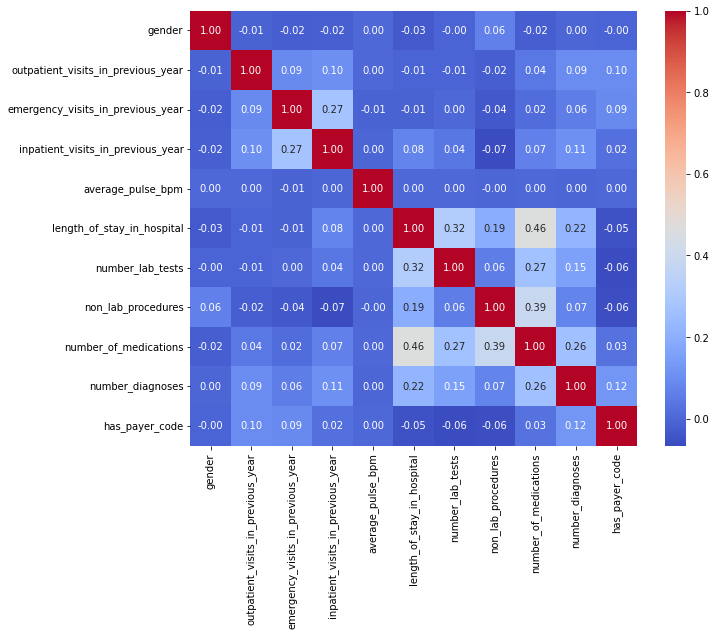

In [115]:
# Select only the numerical columns
numerical_df = data_train_mode.select_dtypes(include=['number'])

# Normalize columns
scaler = MinMaxScaler()
normalized_numerical_df = pd.DataFrame(scaler.fit_transform(numerical_df), columns=numerical_df.columns)

# Calculate the correlation matrix
correlation_matrix = normalized_numerical_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Show the plot
plt.show()



In [116]:
## no correlation 'average_pulse_bpm'
data_train_corr = data_train_mode.drop(columns=['average_pulse_bpm'])

In [117]:
data_train_corr.head(10)

,race,gender,age,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,admission_type,medical_specialty,discharge_disposition,admission_source,...,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass,has_payer_code
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,Caucasian,0.0,[70-80),0,0,2,Emergency,Family/GeneralPractice,Discharged to home,Emergency Room,...,466,8,Unknown,Unknown,No,No,[],No,>30 days,0
426224,AfricanAmerican,1.0,[50-60),0,0,0,Emergency,Unknown,Discharged/transferred to a federal health car...,Clinic Referral,...,162,9,Unknown,Unknown,No,Yes,['insulin'],No,No,0
634063,Caucasian,0.0,[60-70),0,0,1,NaN,Family/GeneralPractice,Discharged to home,NaN,...,250,6,Unknown,Unknown,Ch,Yes,"['glimepiride', 'insulin']",No,No,0
890610,AfricanAmerican,1.0,[60-70),0,0,1,Emergency,InternalMedicine,Discharged to home,Transfer from another health care facility,...,455,5,Unknown,Unknown,No,No,[],No,No,1
654194,Caucasian,0.0,[70-80),1,0,0,Elective,Unknown,Discharged/transferred to home with home healt...,Physician Referral,...,428,9,Unknown,Unknown,No,No,[],No,>30 days,1
269878,Caucasian,0.0,[50-60),0,0,0,Emergency,Surgery-General,Discharged to home,Emergency Room,...,244,3,Unknown,Norm,No,No,[],No,>30 days,0
182051,Caucasian,0.0,[50-60),0,0,0,Emergency,Unknown,Discharged to home,Emergency Room,...,493,9,Unknown,>8,Ch,Yes,"['metformin', 'glimepiride']",No,No,1
964239,Other,1.0,[70-80),0,0,0,Elective,Radiologist,Discharged/transferred to home with home healt...,Physician Referral,...,276,9,Unknown,Unknown,Ch,Yes,"['nateglinide', 'glipizide', 'insulin']",No,No,1
418598,Caucasian,0.0,[50-60),1,0,0,Urgent,Unknown,Discharged to home,Physician Referral,...,276,9,Unknown,Unknown,No,Yes,['insulin'],No,No,1


# Encoding

In [118]:
## Encode age seperate

# Define the mapping
age_mapping = {
    '[0-10)': 0,
    '[10-20)': 1,
    '[20-30)': 2,
    '[30-40)': 3,
    '[40-50)': 4,
    '[50-60)': 5,
    '[60-70)': 6,
    '[70-80)': 7,
    '[80-90)': 8,
    '[90-100)': 9
}

# Apply the mapping to the 'age' column
data_train_corr['age'] = data_train_corr['age'].map(age_mapping)

In [119]:
## Encode diagnosis columns according to chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.cdc.gov/nchs/data/icd/icd9cm_guidelines_2011.pdata_train_corr ----> chapter 3.....

def encode_diagnosis(x):
    if pd.isna(x):
        return 'Unknown'
    elif 1 <= x < 140:
        return 0
    elif 140 <= x < 240:
        return 1
    elif 240 <= x < 280:
        return 2
    elif 280 <= x < 290:
        return 3
    elif 290 <= x < 320:
        return 4
    elif 320 <= x < 390:
        return 5
    elif 390 <= x < 460:
        return 6
    elif 460 <= x < 520:
        return 7
    elif 520 <= x < 580:
        return 8
    elif 580 <= x < 630:
        return 9
    elif 630 <= x < 680:
        return 10
    elif 680 <= x < 710:
        return 11
    elif 710 <= x < 740:
        return 12
    elif 740 <= x < 760:
        return 13
    elif 760 <= x < 780:
        return 14
    elif 780 <= x < 800:
        return 15
    elif 800 <= x < 1000:
        return 16
    else:
        return 17
    
diagnosis_columns = ['primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis']

for column in diagnosis_columns:

    data_train_corr[column] = data_train_corr[column].astype(str)
    data_train_corr[column] = data_train_corr[column].str.replace('V', '-')
    data_train_corr[column] = pd.to_numeric(data_train_corr[column], errors='coerce', downcast='integer')
    data_train_corr[column] = data_train_corr[column].apply(lambda x: round(x) if not pd.isna(x) else x)
    data_train_corr[column] = data_train_corr[column].apply(encode_diagnosis)


for code in range(18):
    data_train_corr[f'diagnosis_{code}'] = 0
data_train_corr[f'diagnosis_Unknown'] = 0

for code in range(18):
    data_train_corr.loc[(data_train_corr['primary_diagnosis'] == code) | (data_train_corr['secondary_diagnosis'] == code) | (data_train_corr['additional_diagnosis'] == code), f'diagnosis_{code}'] = 1
data_train_corr.loc[(data_train_corr['primary_diagnosis'] == 'Unknown') | (data_train_corr['secondary_diagnosis'] == 'Unknown') | (data_train_corr['additional_diagnosis'] == 'Unknown'), f'diagnosis_Unknown'] = 1


In [120]:
specialty_mapping = {
    # Primary Care
    'Family/GeneralPractice': 'Primary Care',
    'InternalMedicine': 'Primary Care',
    'Pediatrics': 'Primary Care',
    'Obstetrics': 'Primary Care',
    'Gynecology': 'Primary Care',
    'Pediatrics-Endocrinology': 'Primary Care',
    'Pediatrics-CriticalCare': 'Primary Care',
    'Pediatrics-Neurology': 'Primary Care',
    'Pediatrics-Pulmonology': 'Primary Care',
    'Pediatrics-AllergyandImmunology': 'Primary Care',
    'Pediatrics-Hematology-Oncology': 'Primary Care',
    'Pediatrics-InfectiousDiseases': 'Primary Care',
    'Cardiology-Pediatric': 'Primary Care',
    'ObstetricsandGynecology': 'Primary Care',

    # Surgical
    'Surgery-General': 'Surgical',
    'Orthopedics': 'Surgical',
    'Surgery-Thoracic': 'Surgical',
    'Orthopedics-Reconstructive': 'Surgical',
    'Surgery-Vascular': 'Surgical',
    'Surgery-Neuro': 'Surgical',
    'Surgery-Cardiovascular/Thoracic': 'Surgical',
    'Surgery-Maxillofacial': 'Surgical',
    'Surgery-Plastic': 'Surgical',
    'Surgery-Cardiovascular': 'Surgical',
    'Surgery-Pediatric': 'Surgical',
    'Surgery-Colon&Rectal': 'Surgical',
    'Obsterics&Gynecology-GynecologicOnco': 'Surgical',
    'Surgeon': 'Surgical',

    # Medical Specialty
    'Cardiology': 'Medical Specialty',
    'Nephrology': 'Medical Specialty',
    'Hematology': 'Medical Specialty',
    'Pulmonology': 'Medical Specialty',
    'Endocrinology': 'Medical Specialty',
    'Rheumatology': 'Medical Specialty',
    'Neurology': 'Medical Specialty',
    'Gastroenterology': 'Medical Specialty',
    'Oncology': 'Medical Specialty',
    'Hematology/Oncology': 'Medical Specialty',
    'InfectiousDiseases': 'Medical Specialty',
    'AllergyandImmunology': 'Medical Specialty',
    'Urology': 'Medical Specialty',
    'Podiatry': 'Medical Specialty',
    'Ophthalmology': 'Medical Specialty',
    'Otolaryngology': 'Medical Specialty',
    'Endocrinology-Metabolism': 'Medical Specialty',

    # Emergency Medicine
    'Emergency/Trauma': 'Emergency Medicine',
    'Pediatrics-EmergencyMedicine': 'Emergency Medicine',

    # Behavioral Health
    'Psychiatry': 'Behavioral Health',
    'Psychology': 'Behavioral Health',
    'Psychiatry-Child/Adolescent': 'Behavioral Health',

    # Rehabilitation Services
    'PhysicalMedicineandRehabilitation': 'Rehabilitation Services',
    'SportsMedicine': 'Rehabilitation Services',

    # Diagnostic Services
    'Radiologist': 'Diagnostic Services',
    'Radiology': 'Diagnostic Services',
    'Pathology': 'Diagnostic Services',
    'Neurophysiology': 'Diagnostic Services',

    # Other
    'PhysicianNotFound': 'Other',
    'Osteopath': 'Other',
    'DCPTEAM': 'Other',
    'Anesthesiology-Pediatric': 'Other',
    'Dentistry': 'Other',
    'OutreachServices': 'Other',
    'Speech': 'Other',
    'Proctology': 'Other',
    'Resident': 'Other',

    'Unknown': 'Uknown'
}

# Map the specialties using the dictionary
data_train_corr['medical_specialty'] = data_train_corr['medical_specialty'].map(specialty_mapping)

# Any specialty not included in the mapping dictionary will be NaN after the map operation.
# Replace NaN values with 'Other'
data_train_corr['medical_specialty'] = data_train_corr['medical_specialty'].fillna('Other')


In [121]:
data_train_corr.isna().sum() / (len(data_train)) * 100

race                                     7.114680
gender                                   0.000000
age                                      4.993472
outpatient_visits_in_previous_year       0.000000
emergency_visits_in_previous_year        0.000000
inpatient_visits_in_previous_year        0.000000
admission_type                           5.202645
medical_specialty                        0.000000
discharge_disposition                    3.635955
admission_source                         6.623335
length_of_stay_in_hospital               0.000000
number_lab_tests                         0.000000
non_lab_procedures                       0.000000
number_of_medications                    0.000000
primary_diagnosis                        0.000000
secondary_diagnosis                      0.000000
additional_diagnosis                     0.000000
number_diagnoses                         0.000000
glucose_test_result                      0.000000
a1c_test_result                          0.000000


In [122]:
binary_features = ['gender', 'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds', 'readmitted_binary', 'readmitted_multiclass']
categorical_features = ['race', 'admission_type', 'discharge_disposition', 'admission_source', 'glucose_test_result', 'a1c_test_result', 'medication', 'medical_specialty', 'primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis']
numerical_features = [col for col in data_train_corr.columns if col not in binary_features + categorical_features]

knn_imputer = KNNImputer(n_neighbors=5)

data_train_corr[numerical_features] = knn_imputer.fit_transform(data_train_corr[numerical_features])

In [123]:
data_train_corr.isna().sum() / (len(data_train)) * 100

race                                     7.114680
gender                                   0.000000
age                                      0.000000
outpatient_visits_in_previous_year       0.000000
emergency_visits_in_previous_year        0.000000
inpatient_visits_in_previous_year        0.000000
admission_type                           5.202645
medical_specialty                        0.000000
discharge_disposition                    3.635955
admission_source                         6.623335
length_of_stay_in_hospital               0.000000
number_lab_tests                         0.000000
non_lab_procedures                       0.000000
number_of_medications                    0.000000
primary_diagnosis                        0.000000
secondary_diagnosis                      0.000000
additional_diagnosis                     0.000000
number_diagnoses                         0.000000
glucose_test_result                      0.000000
a1c_test_result                          0.000000


In [124]:
# Assuming 'data_train' is your DataFrame and 'column_name' is the name of your column
missing_categorical_features = ['race', 'admission_type', 'discharge_disposition', 'admission_source']
for column in missing_categorical_features:
# Calculate the mode of the column
    column_mode = data_train_corr[column].mode()[0]

    # Fill NA values with the mode
    data_train_corr[column].fillna(column_mode, inplace=True)


In [125]:
data_train_corr.isna().sum() / (len(data_train)) * 100

race                                     0.0
gender                                   0.0
age                                      0.0
outpatient_visits_in_previous_year       0.0
emergency_visits_in_previous_year        0.0
inpatient_visits_in_previous_year        0.0
admission_type                           0.0
medical_specialty                        0.0
discharge_disposition                    0.0
admission_source                         0.0
length_of_stay_in_hospital               0.0
number_lab_tests                         0.0
non_lab_procedures                       0.0
number_of_medications                    0.0
primary_diagnosis                        0.0
secondary_diagnosis                      0.0
additional_diagnosis                     0.0
number_diagnoses                         0.0
glucose_test_result                      0.0
a1c_test_result                          0.0
change_in_meds_during_hospitalization    0.0
prescribed_diabetes_meds                 0.0
medication

In [126]:
data_train_corr.head()

,race,gender,age,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,admission_type,medical_specialty,discharge_disposition,admission_source,...,diagnosis_9,diagnosis_10,diagnosis_11,diagnosis_12,diagnosis_13,diagnosis_14,diagnosis_15,diagnosis_16,diagnosis_17,diagnosis_Unknown
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,Caucasian,0.0,7.0,0.0,0.0,2.0,Emergency,Primary Care,Discharged to home,Emergency Room,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
426224,AfricanAmerican,1.0,5.0,0.0,0.0,0.0,Emergency,Uknown,Discharged/transferred to a federal health car...,Clinic Referral,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
634063,Caucasian,0.0,6.0,0.0,0.0,1.0,Emergency,Primary Care,Discharged to home,Emergency Room,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
890610,AfricanAmerican,1.0,6.0,0.0,0.0,1.0,Emergency,Primary Care,Discharged to home,Transfer from another health care facility,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
654194,Caucasian,0.0,7.0,1.0,0.0,0.0,Elective,Uknown,Discharged/transferred to home with home healt...,Physician Referral,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
data_train_hot_encoded = data_train_corr.copy()

In [128]:
## Use One Hot Encoder technique
one_hot_encode_columns = categorical_features.remove('medication')
one_hot_encode_columns = [x for x in categorical_features if x not in ['primary_diagnosis','secondary_diagnosis', 'additional_diagnosis']]

data_train_hot_encoded = pd.get_dummies(data_train_hot_encoded, columns=one_hot_encode_columns).replace({True: 1, False: 0})


In [129]:
## Encode seperately the following columns

data_train_hot_encoded['change_in_meds_during_hospitalization'] = data_train_hot_encoded['change_in_meds_during_hospitalization'].map({'Ch': 1, 'No': 0})
data_train_hot_encoded['prescribed_diabetes_meds'] = data_train_hot_encoded['prescribed_diabetes_meds'].map({'Yes': 1, 'No': 0})

In [130]:
data_train_hot_encoded.dtypes

gender                                       float64
age                                          float64
outpatient_visits_in_previous_year           float64
emergency_visits_in_previous_year            float64
inpatient_visits_in_previous_year            float64
                                              ...   
medical_specialty_Other                        uint8
medical_specialty_Primary Care                 uint8
medical_specialty_Rehabilitation Services      uint8
medical_specialty_Surgical                     uint8
medical_specialty_Uknown                       uint8
Length: 108, dtype: object

In [131]:
medications_list = data_train_hot_encoded['medication'].tolist()

medications_list

unique_medications = []

for i in medications_list:
    list = eval(i)
    for med in list:
        if med not in unique_medications:
            unique_medications.append(med)

for medication in unique_medications:
    # Create a new binary column for the medication and initialize it to 0
    data_train_hot_encoded[medication] = 0
    
    # Set the value to 1 if the patient is taking that medication
    data_train_hot_encoded.loc[data_train_hot_encoded['medication'].str.contains(medication, regex=False), medication] = 1

data_train_hot_encoded.drop(columns=['medication', 'primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis'], inplace=True)

In [132]:
data_train_hot_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71233 entries, 533253 to 459757
Columns: 125 entries, gender to metformin-rosiglitazone
dtypes: float64(30), int64(23), object(2), uint8(70)
memory usage: 35.2+ MB


# Models

In [133]:
data_train_models = data_train_hot_encoded.copy()
data_train_models.isna().sum() / (len(data_train_mode)) * 100



gender                                0.0
age                                   0.0
outpatient_visits_in_previous_year    0.0
emergency_visits_in_previous_year     0.0
inpatient_visits_in_previous_year     0.0
                                     ... 
tolbutamide                           0.0
glimepiride-pioglitazone              0.0
metformin-pioglitazone                0.0
acetohexamide                         0.0
metformin-rosiglitazone               0.0
Length: 125, dtype: float64

In [134]:
# Extract features and target variable
X = data_train_models.drop(['readmitted_binary', 'readmitted_multiclass'], axis=1)
y = data_train_models['readmitted_binary'].map({'Yes': 1, 'No': 0})


In [135]:
for i in X.columns:
    print(f"{i}: {X[i].unique()}")

gender: [0. 1.]
age: [7.  5.  6.  8.  6.2 4.  7.6 2.  3.  9.  6.6 5.2 4.4 6.4 1.  5.4 5.8 4.6
 6.8 7.4 5.6 7.2 0.  4.2 3.8 7.8 2.8 1.8 4.8 3.2 3.6 2.6 3.4 1.6 2.4 8.2
 2.2 1.4 8.4 0.8]
outpatient_visits_in_previous_year: [ 0.  1.  2.  6.  5.  3.  4.  9. 36. 11.  7. 16.  8. 10. 12. 15. 13. 20.
 27. 14. 35. 22. 24. 21. 17. 38. 18. 37. 23. 19. 25. 29. 26. 42. 33. 39.
 34. 28.]
emergency_visits_in_previous_year: [ 0.  1.  6.  2.  5.  4.  9.  3. 10.  7. 11. 12. 13. 22.  8. 14. 19. 25.
 20. 37. 29. 28. 18. 16. 15. 21. 24. 42. 76. 63.]
inpatient_visits_in_previous_year: [ 2.  0.  1.  4.  5.  3.  7. 11. 14.  9.  6. 21.  8. 13. 10. 16. 12. 15.
 19. 18. 17.]
length_of_stay_in_hospital: [ 2. 14.  6.  3.  1.  8.  4.  5.  7. 12.  9. 13. 10. 11.]
number_lab_tests: [ 48.  71.  60.  47.  58.  59.  56.  55.  40.  51.  64.  67.  10.  36.
  25.  52.  22.  38.  42.  43.  57.   1.  44.  69.  12.  18.  53.  41.
  75.  89.  16.  77.  66.  35.  86.  37.  21.  61.  14.  31.  27.  30.
   4.  80.  28.   2.  72. 

In [136]:
# Identify binary columns (assuming binary columns have values 0 or 1)
binary_columns = [col for col in X.columns if set(X[col]) == {0, 1}]

# Separate non-binary columns
non_binary_columns = [col for col in X.columns if col not in binary_columns]

# Create a copy of the DataFrame to preserve the original data
X_scaled = X.copy()

# Initialize the MinMaxScaler to normalize between 0 and 1
scaler = MinMaxScaler()

# Apply scaling to non-binary columns
X_scaled[non_binary_columns] = scaler.fit_transform(X[non_binary_columns])

# The X_scaled DataFrame now contains normalized non-binary features between 0 and 1, while binary columns remain unchanged
# Converted every column into float
X_scaled = X_scaled.astype(float)
X_scaled.head()

,gender,age,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,length_of_stay_in_hospital,number_lab_tests,non_lab_procedures,number_of_medications,number_diagnoses,...,tolazamide,troglitazone,miglitol,chlorpropamide,glipizide-metformin,tolbutamide,glimepiride-pioglitazone,metformin-pioglitazone,acetohexamide,metformin-rosiglitazone
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,0.0,0.777778,0.00000,0.0,0.095238,0.076923,0.391667,0.000000,0.256757,0.466667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
426224,1.0,0.555556,0.00000,0.0,0.000000,1.000000,0.583333,0.000000,0.324324,0.533333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
634063,0.0,0.666667,0.00000,0.0,0.047619,0.384615,0.491667,0.166667,0.283784,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
890610,1.0,0.666667,0.00000,0.0,0.047619,0.384615,0.391667,0.333333,0.108108,0.266667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
654194,0.0,0.777778,0.02381,0.0,0.000000,0.384615,0.383333,0.166667,0.189189,0.533333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
X_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71233 entries, 533253 to 459757
Columns: 123 entries, gender to metformin-rosiglitazone
dtypes: float64(123)
memory usage: 67.4 MB


In [138]:
## Splitting and oversampling

# Split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution
unique, counts = np.unique(y_train_resampled, return_counts=True)
print(dict(zip(unique, counts)))

{0: 50568, 1: 50568}


In [139]:
## create a model

model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)



RandomForestClassifier(random_state=42)

In [142]:
X = pd.read_csv('test_processed.csv')
X.set_index('encounter_id', inplace = True)


y = pd.read_csv('y_test')['readmitted_binary']
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

print(f'F1 Score: {f1}')

F1 Score: 0.04932182490752157


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

# Create a neural network model
model_nn = MLPClassifier(random_state=42)
model_nn.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_nn = model_nn.predict(X_test)

# Calculate the F1 score for the neural network model
f1_nn = f1_score(y_test, y_pred_nn)

print(f'Neural Network F1 Score: {f1_nn}')


Neural Network F1 Score: 0.1835138387484958


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Create a logistic regression model
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_lr = model_lr.predict(X_test)

# Calculate the F1 score for the logistic regression model
f1_lr = f1_score(y_test, y_pred_lr)

print(f'Logistic Regression F1 Score: {f1_lr}')


Logistic Regression F1 Score: 0.24898342195808573


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# Create a k-nearest neighbors (KNN) model
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_knn = model_knn.predict(X_test)

# Calculate the F1 score for the KNN model
f1_knn = f1_score(y_test, y_pred_knn)

print(f'KNN F1 Score: {f1_knn}')


KNN F1 Score: 0.19988479262672815
